In [23]:
import pandas as pd

titanic_df = pd.read_csv("Titanic_data.csv")

In [24]:
titanic_df.shape

(891, 12)

In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Inserting and Deleting Column and Rows

In [3]:
# Dropping a column
# dataframe.drop(<column_name>, axis)
# axis : {0 or 'index', 1 or 'columns'}, default 0
#     Whether to drop labels from the index (0 or 'index') or columns (1 or 'columns')

titanic_df.drop("PassengerId", axis = 1, inplace = True)

In [4]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.drop([0,2,5], axis =0, inplace=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [8]:
titanic_df['Last_Name'] = [name.split(",")[0] for name in titanic_df['Name']]
titanic_df['Initials'] = [name.split(".")[0].split(",")[-1].strip() for name in titanic_df['Name']]
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initials,Last_Name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen


In [9]:
dropped_titainic = titanic_df.drop(['Initials','Last_Name'], axis =1)

In [11]:
dropped_titainic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Insert new row
titanic_df.loc[900,:] = [0,3,'THapa, Mr. Ram', "male",33.2, 0,0," ", 33.4, " ", "S"]

In [ ]:
titanic_df.tail()

## Handling NaN or Null Value

In [26]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. Remove Null values
2. Imputation
3. Feature Engineering

In [34]:
# Removing Null columns
# titanic_df_filter = titanic_df[titanic_df['Embarked'].notna()]

# dropna
titanic_df_filter = titanic_df.dropna(axis = 0, how='any', subset="Embarked", ignore_index=True)

In [29]:
titanic_df_filter.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

29.64209269662921


<Axes: ylabel='Frequency'>

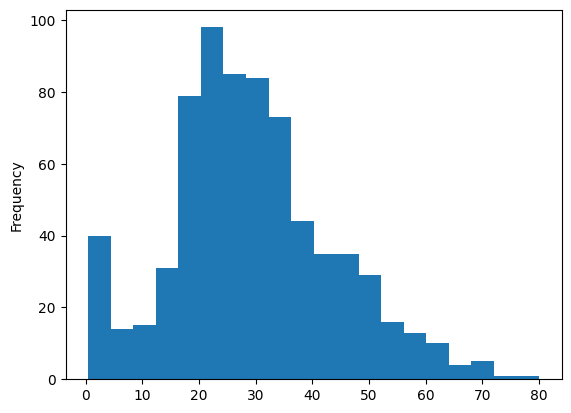

In [31]:
# Imputation (Age)
print(titanic_df_filter.Age.mean())
titanic_df_filter.Age.plot.hist(bins=20)

In [39]:
mean_age = titanic_df_filter['Age'].mean()
mean_age

np.float64(29.64209269662921)

In [41]:
titanic_df_filter['Age'].fillna(value=mean_age, inplace=True) 

/tmp/ipykernel_58368/1528236068.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df_filter['Age'].fillna(value=mean_age, inplace=True)
/tmp/ipykernel_58368/1528236068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_filter['Age'].fillna(value=mean_age, inplace=True)


<Axes: ylabel='Frequency'>

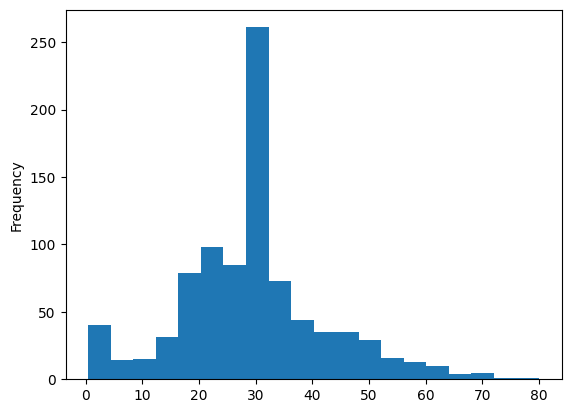

In [45]:
titanic_df_filter.Age.plot.hist(bins=20)

In [47]:
# Assignment: Imputation of Age column w.r.t gender provided.


In [49]:
titanic_df_filter['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [58]:
# Feature from Null value
titanic_df_filter.loc[:,'Cabin'] = titanic_df_filter['Cabin'].notna().astype(int)

In [59]:
titanic_df_filter.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [60]:
titanic_df_filter.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S


## Handling Outliers

https://blog.zhaytam.com/img/800px-Boxplot_vs_PDF.svg-1-768x557.png

<Axes: >

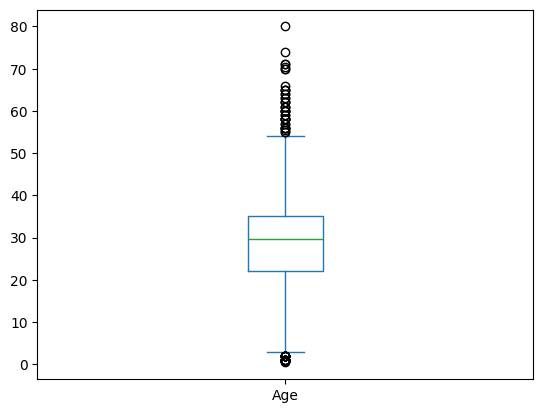

In [80]:
titanic_df_filter.Age.plot.box()

In [81]:
Q1 = titanic_df_filter.Age.quantile(q = 0.25)
Q3 = titanic_df_filter.Age.quantile(q = 0.75)
IQR = Q3 -Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print(upper_limit, lower_limit)

54.5 2.5


In [84]:
titanic_df_filter[(titanic_df_filter.Age > upper_limit) | (titanic_df_filter.Age < lower_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,1,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,1,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,1,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,1,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
823,825,0,3,"Panula, Master. Urho Abraham",male,2.00,4,1,3101295,39.6875,1,S
826,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,1,C
829,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,1,S
849,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,1,S
